<a href="https://colab.research.google.com/github/Patojukarthikeya73/Infosys_Springboard/blob/main/final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Step 1: Define a list of at least 10 code snippets
code_snippets = [
    "def factorial(n):\n    return 1 if n==0 else n*factorial(n-1)",
    "class MyClass:\n    def __init__(self, x):\n        self.x = x",
    "import math\n\ndef circle_area(r):\n    return math.pi * r ** 2",
    "def bubble_sort(arr):\n    for i in range(len(arr)):\n        for j in range(len(arr)-i-1):\n            if arr[j] > arr[j+1]:\n                arr[j], arr[j+1] = arr[j+1], arr[j]",
    "def fibonacci(n):\n    a, b = 0, 1\n    for _ in range(n):\n        a, b = b, a+b\n    return a",
    "class Vehicle:\n    pass",
    "from datetime import datetime\n\ndef get_current_time():\n    return datetime.now()",
    "def is_even(num):\n    return num % 2 == 0",
    "def greet(name):\n    print(f'Hello, {name}!')",
    "try:\n    x = 1 / 0\nexcept ZeroDivisionError:\n    print('Cannot divide by zero')"
]


In [ ]:
# Step 2: Parse each snippet and extract functions, classes, imports, and patterns
import ast

for idx, snippet in enumerate(code_snippets):
    print(f"\n## Snippet {idx+1}")
    tree = ast.parse(snippet)
    functions = [n.name for n in ast.walk(tree) if isinstance(n, ast.FunctionDef)]
    classes = [n.name for n in ast.walk(tree) if isinstance(n, ast.ClassDef)]
    imports = [n.names[0].name for n in ast.walk(tree) if isinstance(n, ast.Import)]
    patterns = [type(n).__name__ for n in ast.walk(tree) if isinstance(n, (ast.For, ast.If, ast.While, ast.Try))]
    print("Functions:", functions)
    print("Classes:", classes)
    print("Imports:", imports)
    print("Patterns:", patterns)



## Snippet 1
Functions: ['factorial']
Classes: []
Imports: []
Patterns: []

## Snippet 2
Functions: ['__init__']
Classes: ['MyClass']
Imports: []
Patterns: []

## Snippet 3
Functions: ['circle_area']
Classes: []
Imports: ['math']
Patterns: []

## Snippet 4
Functions: ['bubble_sort']
Classes: []
Imports: []
Patterns: ['For', 'For', 'If']

## Snippet 5
Functions: ['fibonacci']
Classes: []
Imports: []
Patterns: ['For']

## Snippet 6
Functions: []
Classes: ['Vehicle']
Imports: []
Patterns: []

## Snippet 7
Functions: ['get_current_time']
Classes: []
Imports: []
Patterns: []

## Snippet 8
Functions: ['is_even']
Classes: []
Imports: []
Patterns: []

## Snippet 9
Functions: ['greet']
Classes: []
Imports: []
Patterns: []

## Snippet 10
Functions: []
Classes: []
Imports: []
Patterns: ['Try']


In [ ]:
# Step 3: Tokenize each code snippet
import io
import tokenize

def tokenize_code(snippet):
    tokens = []
    readline = io.BytesIO(snippet.encode('utf-8')).readline
    for tok in tokenize.tokenize(readline):
        tokens.append((tokenize.tok_name.get(tok.type), tok.string))
    return tokens

for idx, snippet in enumerate(code_snippets):
    print(f"\n## Tokens for Snippet {idx+1}")
    print(tokenize_code(snippet))



## Tokens for Snippet 1
[('ENCODING', 'utf-8'), ('NAME', 'def'), ('NAME', 'factorial'), ('OP', '('), ('NAME', 'n'), ('OP', ')'), ('OP', ':'), ('NEWLINE', '\n'), ('INDENT', '    '), ('NAME', 'return'), ('NUMBER', '1'), ('NAME', 'if'), ('NAME', 'n'), ('OP', '=='), ('NUMBER', '0'), ('NAME', 'else'), ('NAME', 'n'), ('OP', '*'), ('NAME', 'factorial'), ('OP', '('), ('NAME', 'n'), ('OP', '-'), ('NUMBER', '1'), ('OP', ')'), ('NEWLINE', ''), ('DEDENT', ''), ('ENDMARKER', '')]

## Tokens for Snippet 2
[('ENCODING', 'utf-8'), ('NAME', 'class'), ('NAME', 'MyClass'), ('OP', ':'), ('NEWLINE', '\n'), ('INDENT', '    '), ('NAME', 'def'), ('NAME', '__init__'), ('OP', '('), ('NAME', 'self'), ('OP', ','), ('NAME', 'x'), ('OP', ')'), ('OP', ':'), ('NEWLINE', '\n'), ('INDENT', '        '), ('NAME', 'self'), ('OP', '.'), ('NAME', 'x'), ('OP', '='), ('NAME', 'x'), ('NEWLINE', ''), ('DEDENT', ''), ('DEDENT', ''), ('ENDMARKER', '')]

## Tokens for Snippet 3
[('ENCODING', 'utf-8'), ('NAME', 'import'), ('NAME',

In [ ]:

# Step 4: Generate embeddings using at least 3 different pre-trained models
import numpy
from sentence_transformers import SentenceTransformer

print(numpy.__version__)

models = {
    "MiniLM": SentenceTransformer("sentence-transformers/all-MiniLM-L6-v2"),
    "DistilRoBERTa": SentenceTransformer("sentence-transformers/all-distilroberta-v1"),
    "MPNet": SentenceTransformer("sentence-transformers/all-mpnet-base-v2")
}

embeddings = {}
for model_name, model in models.items():
    embeddings[model_name] = model.encode(code_snippets, batch_size=4, show_progress_bar=True)
    print(f"{model_name} embeddings shape:", embeddings[model_name].shape)


1.26.4


Batches:   0%|          | 0/3 [00:00<?, ?it/s]

MiniLM embeddings shape: (10, 384)


Batches:   0%|          | 0/3 [00:00<?, ?it/s]

DistilRoBERTa embeddings shape: (10, 768)


Batches:   0%|          | 0/3 [00:00<?, ?it/s]

MPNet embeddings shape: (10, 768)


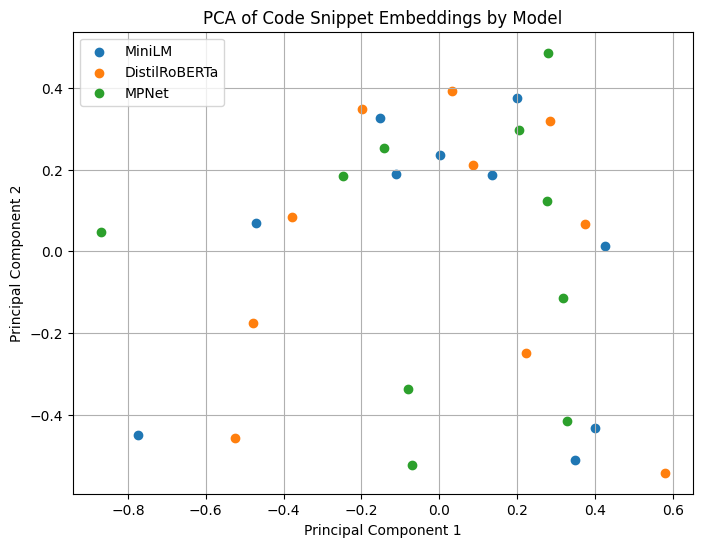

In [ ]:
# Step 5: Compare and visualize embeddings
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
plt.figure(figsize=(8,6))

for model_name in embeddings:
    reduced = pca.fit_transform(embeddings[model_name])
    plt.scatter(reduced[:,0], reduced[:,1], label=model_name)

plt.title("PCA of Code Snippet Embeddings by Model")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid(True)
plt.show()
